Nome:

*    Allan Affonso Alves Paulo - RM: 553601
*    Arthur Felipe Estevão da Silva - RM: 553320
*    Davy de Araujo Rodrigues - RM: 554325
*    Gabriel de Faria Mangini - RM: 552856
*    Vitor Raposo de Medeiros - RM: 552760




# Checkpoint 1

## Carregar módulos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
path_dead =  'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

## Carregar dados

In [ ]:
dados_paises_covid = pd.read_csv(path)
dados_paises_covid_dead = pd.read_csv(path_dead)

In [ ]:
dados_paises_covid

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


## Ajustes



- Nomes das colunas

In [ ]:
dados_paises_covid.rename(columns={"Province/State": "province",
                                   "Country/Region": "country"},
                          inplace=True)

In [ ]:
dados_paises_covid_dead.rename(columns={"Province/State": "province",
                                        "Country/Region": "country"},
                               inplace=True)

In [ ]:
dados_paises_covid_dead.columns

Index(['province', 'country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

- Reajustar dados

In [ ]:
dados_paises_covid = dados_paises_covid.melt(id_vars=['province', 'country', 'Lat', 'Long'],
                                             var_name = 'date',
                                             value_name = 'infected')

In [ ]:
dados_paises_covid_dead = dados_paises_covid_dead.melt(id_vars=['province', 'country', 'Lat', 'Long'],
                                                       var_name = 'date',
                                                       value_name = 'dead')

In [ ]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,3/9/23,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,3/9/23,0
330324,NaN,Yemen,15.552727,48.516388,3/9/23,2159
330325,NaN,Zambia,-13.133897,27.849332,3/9/23,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,3/9/23,5671


In [ ]:
dados_paises_covid_dead.dtypes

province     object
country      object
Lat         float64
Long        float64
date         object
dead          int64
dtype: object

- Ajustar datas

In [ ]:
dados_paises_covid['date'] = pd.to_datetime(dados_paises_covid['date'],
                                            infer_datetime_format='True')

In [ ]:
dados_paises_covid_dead['date'] = pd.to_datetime(dados_paises_covid_dead['date'],
                                                 infer_datetime_format='True')

In [ ]:
dados_paises_covid.tail()

,province,country,Lat,Long,date,infected
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,264276


In [ ]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,0
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,2159
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,5671


In [ ]:
dados_paises_covid_dead.dtypes

province            object
country             object
Lat                float64
Long               float64
date        datetime64[ns]
dead                 int64
dtype: object

- Combinar os datasets

In [ ]:
dados_paises_covid.shape

(330327, 6)

In [ ]:
dados_paises_covid_dead.shape

(330327, 6)

In [ ]:
dados_covid = pd.merge(dados_paises_covid, dados_paises_covid_dead,
                       on = ['province', 'country',	'Lat',	'Long',	'date'],
                       how = 'inner')

In [ ]:
dados_covid.head()

,province,country,Lat,Long,date,infected,dead
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0


In [ ]:
dados_covid.shape

(330327, 7)

## Aqui começa o trabalho

## Questão 1
###1 –Quantos países existem no banco de dados?

In [ ]:
dados_covid['date'].max()

Timestamp('2023-03-09 00:00:00')

In [ ]:
# Filtrando apenas os dados mais atuis 'ultimo dia'
ultimo_dia = dados_covid[dados_covid['date'] == '2023-03-09']
ultimo_dia['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [ ]:
# Removendo linhas que não são países
ultimo_dia = ultimo_dia.drop(ultimo_dia[ultimo_dia['country'].isin(['Winter Olympics 2022', 'Summer Olympics 2020', 'MS Zaandam', 'Diamond Princess'])].index)
ultimo_dia['country'].nunique()

197

## Resposta
Existem 197 países no banco de dados, após removermos as olipiadas 'Winter Olympics 2022' e 'Summer Olympics 2020' e os navios 'MS Zaandam' e 'Diamond Princess'

## Questão 2
### 2 –Quantos casos de infectados e mortes Brasil, Itália e E.U.A. possuem até o momento?

In [ ]:
# Somando a quantidade de mortos e infectados de cada pais, removendo as provincias do dataframe.
ultimo_dia_total = ultimo_dia.groupby('country').agg(infected_total = pd.NamedAgg('infected', sum), dead_total = pd.NamedAgg('dead', sum))
ultimo_dia_total = ultimo_dia_total.reset_index()
ultimo_dia_total

,country,infected_total,dead_total
0,Afghanistan,209451,7896
1,Albania,334457,3598
2,Algeria,271496,6881
3,Andorra,47890,165
4,Angola,105288,1933
...,...,...,...
192,Vietnam,11526994,43186
193,West Bank and Gaza,703228,5708
194,Yemen,11945,2159
195,Zambia,343135,4057


In [ ]:
#Filtro para os paises Brasil, Italia e US
ultimo_dia_total[ultimo_dia_total['country'].isin(['Brazil', 'Italy', 'US'])]

,country,infected_total,dead_total
24,Brazil,37076053,699276
85,Italy,25603510,188322
183,US,103802702,1123836


##Resposta
Até o momento:

1.   Brasil possui 37076053 infectados e 699276 mortos.
2.   Itália possui 25603510 infectados e 188322 mortos.
3.   Estados Unidos possui 103802702 infectados e 1123836 mortos.





##Questão 3
### 3 –Quais os 10 países que possuem os maiores valores de infectados? E quais os 10 de maiores mortes?

In [ ]:
# Ordem por maior número de infectados
top_paises_infectados = ultimo_dia_total.sort_values('infected_total', ascending = False)[['country', 'infected_total']]
top_paises_infectados.head(10)

,country,infected_total
183,US,103802702
79,India,44690738
62,France,39866718
66,Germany,38249060
24,Brazil,37076053
87,Japan,33320438
93,"Korea, South",30615522
85,Italy,25603510
187,United Kingdom,24658705
145,Russia,22075858


In [ ]:
# Ordem por maior número de mortos
top_paises_mortos = ultimo_dia_total.sort_values('dead_total', ascending = False)[['country', 'dead_total']]
top_paises_mortos.head(10)

,country,dead_total
183,US,1123836
24,Brazil,699276
79,India,530779
145,Russia,388478
115,Mexico,333188
187,United Kingdom,220721
139,Peru,219539
85,Italy,188322
66,Germany,168935
62,France,166176


##Resposta
### Os 10 países com maior quantidade de infectados são respectivamente:

1.   Estados Unidos
2.   India
3.   França
4.   Alemanha
5.   Brasil
6.   Japão
7.   Coreia do Sul
8.   Itália
9.   Reino Unido
10.  Russia

### Os 10 países com maior quantidade de mortos são respectivamente:

1.   Estados Unidos
2.   Brasil
3.   India
4.   Russia
5.   México
6.   Reino Unido
7.   Peru
8.   Itália
9.   Alemanha
10.  França


## Questão 4
### 4 –Criar uma coluna denominada taxa de mortalidade (mortos/infectados). Quais os 10 países que  possuem  maiores  valores  desta  taxa?Você  acredita  que  a  taxa  de  mortalidade  uma  boa métrica? Quais vieses você conseguiu perceber?

In [ ]:
ultimo_dia_total

,country,infected_total,dead_total
0,Afghanistan,209451,7896
1,Albania,334457,3598
2,Algeria,271496,6881
3,Andorra,47890,165
4,Angola,105288,1933
...,...,...,...
192,Vietnam,11526994,43186
193,West Bank and Gaza,703228,5708
194,Yemen,11945,2159
195,Zambia,343135,4057


In [ ]:
# Criando nova coluna (mortos/infectados)

ultimo_dia_total['taxa_mortalidade'] = ultimo_dia_total['dead_total']/ultimo_dia_total['infected_total']
ultimo_dia_total

,country,infected_total,dead_total,taxa_mortalidade
0,Afghanistan,209451,7896,0.037699
1,Albania,334457,3598,0.010758
2,Algeria,271496,6881,0.025345
3,Andorra,47890,165,0.003445
4,Angola,105288,1933,0.018359
...,...,...,...,...
192,Vietnam,11526994,43186,0.003747
193,West Bank and Gaza,703228,5708,0.008117
194,Yemen,11945,2159,0.180745
195,Zambia,343135,4057,0.011823


In [ ]:
# Ordenando os tpo 10 países com maior taxa de mortalidade
top_taxa_mortaliade = ultimo_dia_total.sort_values('taxa_mortalidade', ascending = False)[['country', 'taxa_mortalidade']]
top_taxa_mortaliade.head(10)

,country,taxa_mortalidade
92,"Korea, North",6.000000
194,Yemen,0.180745
167,Sudan,0.078601
171,Syria,0.055058
162,Somalia,0.049810
139,Peru,0.048922
53,Egypt,0.048108
115,Mexico,0.044523
22,Bosnia and Herzegovina,0.040525
0,Afghanistan,0.037699


## Resposta
### Os 10 países com maior taxa de mortaliade são respectivamente:

1.   Coreia do Norte
2.   Iêmen
3.   Sudão
4.   Síria
5.   Somália
6.   Peru
7.   Egito
8.   México
9.   Bósnia e Herzegovina
10.  Afeganistão

### Acreditamos que a taxa de mortalidade não é uma boa métrica.
### Embora a taxa possa ser usada para medir o grau de impacto da covid nos paíes, deve se levar em conta que ela sofre grande variações de acordo com a localização, número de habitantes e condições de cada país. Até mesmo com infectados pela covid que acabaram não apresentando sintomas, assim, não sendo contabilizados no índice, pois não foram regsitrados.
### Podemos considerar seu uso apenas caso seja feita uma análise mais detalhada e considerando outros fatores que afetem a taxa de mortalidade.


## Questão 5
### 5 –Gere os seguintes gráficos:




*   Gráfico  de  linhas  contendo  a  evolução  do  número  de  infectados  do  Brasile Estados Unidos.


In [ ]:
dados_covid

,province,country,Lat,Long,date,infected,dead
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0
...,...,...,...,...,...,...,...
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535,0
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945,2159
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135,4057


In [ ]:
dados_covid_BR_US = dados_covid[dados_covid['country'].isin(['Brazil', 'US'])]
dados_covid_BR_US = dados_covid_BR_US.drop(columns = ['province', 'Lat', 'Long'])
dados_covid_BR_US


,country,date,infected,dead
31,Brazil,2020-01-22,0,0
260,US,2020-01-22,1,0
320,Brazil,2020-01-23,0,0
549,US,2020-01-23,1,0
609,Brazil,2020-01-24,0,0
...,...,...,...,...
329720,US,2023-03-07,103690910,1122516
329780,Brazil,2023-03-08,37076053,699276
330009,US,2023-03-08,103755771,1123246
330069,Brazil,2023-03-09,37076053,699276


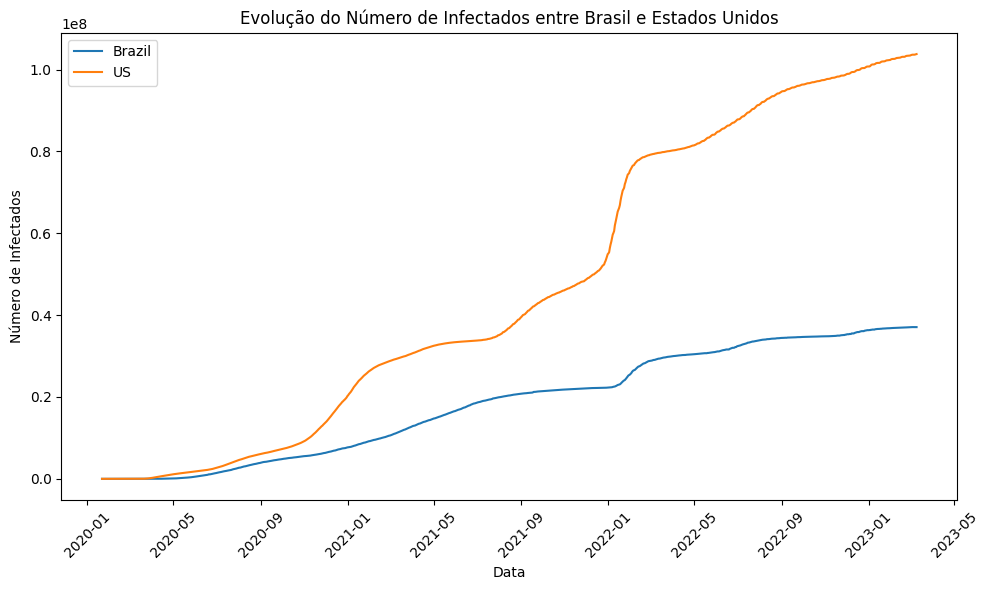

In [ ]:
grouped = dados_covid_BR_US.groupby('country')
plt.figure(figsize=(10, 6))
for country, data in grouped:
    plt.plot(data['date'], data['infected'], label=country)
plt.xlabel('Data')
plt.ylabel('Número de Infectados')
plt.legend()
plt.xticks(rotation=45)
plt.title('Evolução do Número de Infectados entre Brasil e Estados Unidos')
plt.tight_layout()


*   Gráfico  de  linhas  contendo  a  evolução  do  número  de  mortos  do  Brasile Estados Unidos.


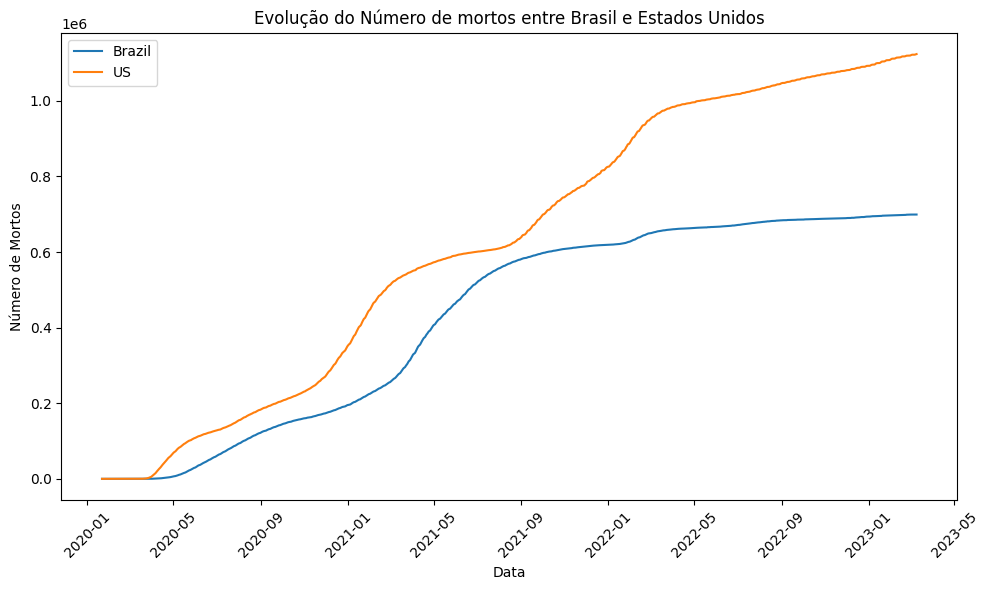

In [ ]:
grouped = dados_covid_BR_US.groupby('country')
plt.figure(figsize=(10, 6))
for country, data in grouped:
    plt.plot(data['date'], data['dead'], label=country)
plt.xlabel('Data')
plt.ylabel('Número de Mortos')
plt.legend()
plt.xticks(rotation=45)
plt.title('Evolução do Número de mortos entre Brasil e Estados Unidos')
plt.tight_layout()

*   Gráfico de barras comparando o número de infectados de Brasil e Estados Unidos em 20/mar.


In [ ]:
dia_20mar = dados_covid_BR_US[(dados_covid_BR_US['date'] == '2022-03-20')]
dia_20mar

,country,date,infected,dead
227763,Brazil,2022-03-20,29637814,657495
227992,US,2022-03-20,79867776,974314


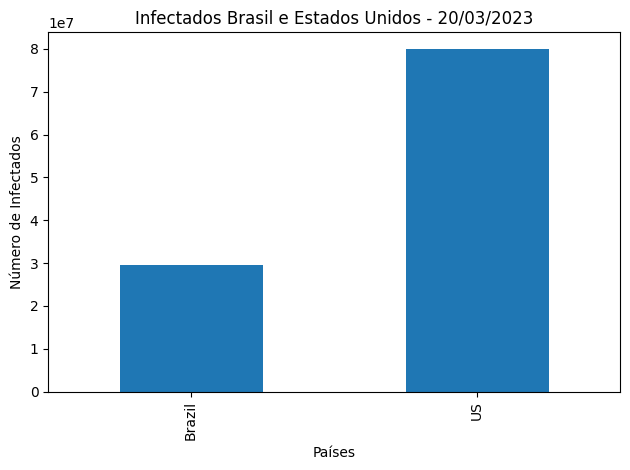

In [ ]:
dia_20mar.plot.bar(x = 'country', y = 'infected', legend = None)
plt.xlabel("Países")
plt.ylabel("Número de Infectados")
plt.title('Infectados Brasil e Estados Unidos - 20/03/2023')
plt.tight_layout()

*   Gráfico de barras comparando o número de morots de Brasil e Estados Unidos em 20/mar.


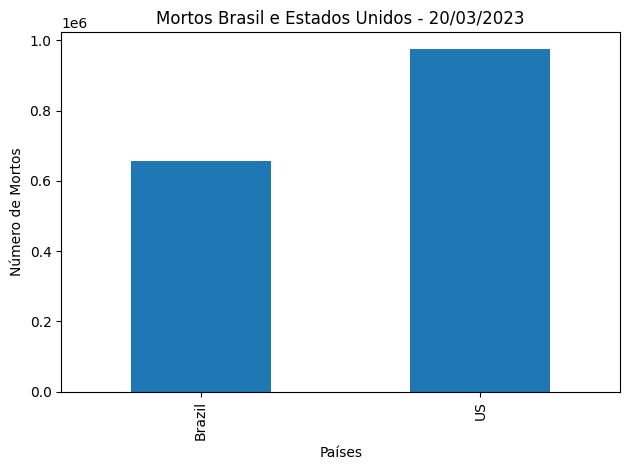

In [ ]:
dia_20mar.plot.bar(x = 'country', y = 'dead', legend = None)
plt.xlabel("Países")
plt.ylabel("Número de Mortos")
plt.title('Mortos Brasil e Estados Unidos - 20/03/2023')
plt.tight_layout()

*   Gráfico de barras comparando a taxa de mortalidade de Brasil e Estados Unidos em 20/mar.


In [ ]:
##ultimo_dia_total['taxa_mortalidade'] = ultimo_dia_total['dead_total']/ultimo_dia_total['infected_total']
dia_20mar['taxa_mortalidade'] = dia_20mar['dead']/dia_20mar['infected']
dia_20mar

<ipython-input-60-42304f054aaf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia_20mar['taxa_mortalidade'] = dia_20mar['dead']/dia_20mar['infected']


,country,date,infected,dead,taxa_mortalidade
227763,Brazil,2022-03-20,29637814,657495,0.022184
227992,US,2022-03-20,79867776,974314,0.012199


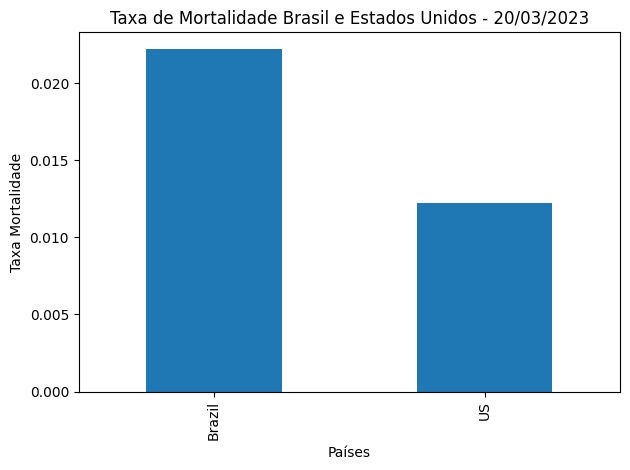

In [ ]:
dia_20mar.plot.bar(x = 'country', y = 'taxa_mortalidade', legend = None)
plt.xlabel("Países")
plt.ylabel("Taxa Mortalidade")
plt.title('Taxa de Mortalidade Brasil e Estados Unidos - 20/03/2023')
plt.tight_layout()